Cross-Validation
----------------------------------------

In [ ]:
from sklearn.datasets import load_iris

In [2]:

import pandas as pd
# load data and split
df = pd.read_csv("/Users/shermanash/ds/metis/nyc16_ds6/04-mcnulty1/04-svms/cleveland_full_1.csv")
cols_we_like = [col for col in df.columns if col not in [['id','location','num']]]
# train test split
X = df[cols_we_like]
y = df.num
#X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
#iris = load_iris()
#X = iris.data
#y = iris.target

In [4]:
#print(df.DESCR)

In [7]:
from sklearn.cross_validation import cross_val_score
from sklearn.svm import LinearSVC

In [8]:
cross_val_score(LinearSVC(), X, y, cv=5)

array([ 0.59322034,  0.32758621,  0.54545455,  0.61818182,  0.63636364])

In [9]:
cross_val_score(LinearSVC(), X, y, cv=5, scoring="f1_macro")

//anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([ 0.53584667,  0.32510823,  0.15805556,  0.366061  ,  0.06492039])

Let's go to a binary task for a moment

In [10]:
y % 2

0      0
1      0
2      1
3      0
4      0
5      0
6      1
7      0
8      0
9      1
10     0
11     0
12     0
13     0
14     0
15     0
16     1
17     0
18     0
19     0
20     0
21     0
22     1
23     1
24     0
25     0
26     0
27     0
28     0
29     1
      ..
252    0
253    0
254    0
255    0
256    0
257    0
258    0
259    1
260    0
261    1
262    0
263    0
264    0
265    0
266    0
267    0
268    1
269    0
270    1
271    0
272    0
273    0
274    1
275    0
276    0
277    0
278    1
279    0
280    0
281    0
Name: num, dtype: int64

In [11]:
cross_val_score(LinearSVC(), X, y % 2)

array([ 0.71578947,  0.75531915,  0.7311828 ])

In [12]:
cross_val_score(LinearSVC(), X, y % 2, scoring="average_precision")

array([ 0.48243618,  0.51557343,  0.42759785])

In [24]:
cross_val_score(LinearSVC(), X, y % 2, scoring="roc_auc")

array([ 0.75479744,  0.7761194 ,  0.69304153])

In [14]:
from sklearn.metrics.scorer import SCORERS
print(SCORERS.keys())

['f1', 'f1_weighted', 'f1_samples', 'recall_samples', 'recall_micro', 'adjusted_rand_score', 'recall_macro', 'mean_absolute_error', 'precision_macro', 'precision_weighted', 'f1_macro', 'recall_weighted', 'accuracy', 'precision_samples', 'median_absolute_error', 'precision', 'log_loss', 'precision_micro', 'average_precision', 'roc_auc', 'r2', 'recall', 'mean_squared_error', 'f1_micro']


There are other ways to do cross-valiation

In [25]:
from sklearn.cross_validation import ShuffleSplit

shuffle_split = ShuffleSplit(len(X), 10, test_size=.4)
cross_val_score(LinearSVC(), X, y, cv=shuffle_split)

array([ 0.67256637,  0.62831858,  0.63716814,  0.25663717,  0.55752212,
        0.53097345,  0.62831858,  0.61061947,  0.62831858,  0.27433628])

In [26]:
from sklearn.cross_validation import StratifiedKFold, KFold, ShuffleSplit
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
def plot_cv(cv, n_samples):
    masks = []
    for train, test in cv:
        mask = np.zeros(n_samples, dtype=bool)
        mask[test] = 1
        masks.append(mask)
    plt.figure(figsize=(10, 4))
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1)
    plt.imshow(masks, interpolation='none')

<IPython.core.display.Javascript object>


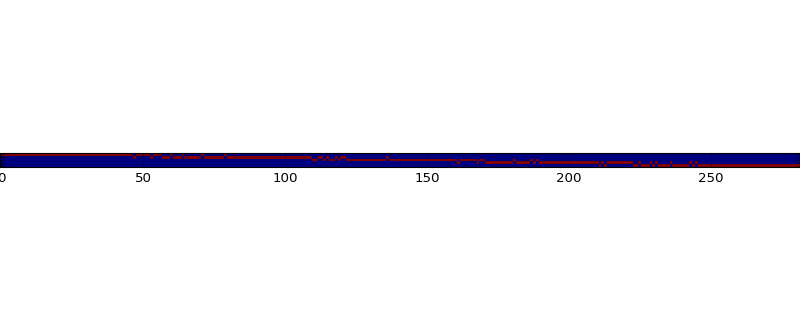

In [27]:
plot_cv(StratifiedKFold(y, n_folds=5), len(X))

<IPython.core.display.Javascript object>


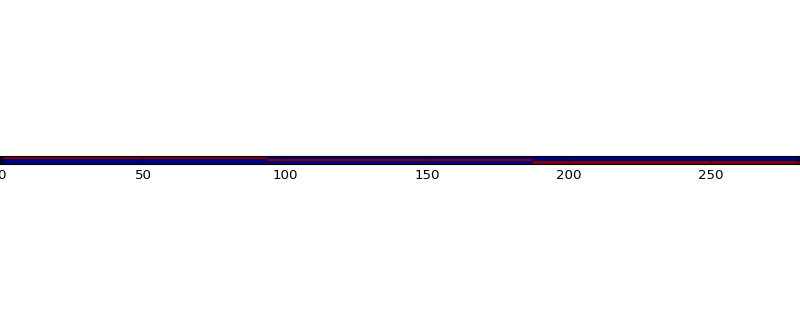

In [28]:
plot_cv(KFold(len(X), n_folds=3), len(X))

<IPython.core.display.Javascript object>


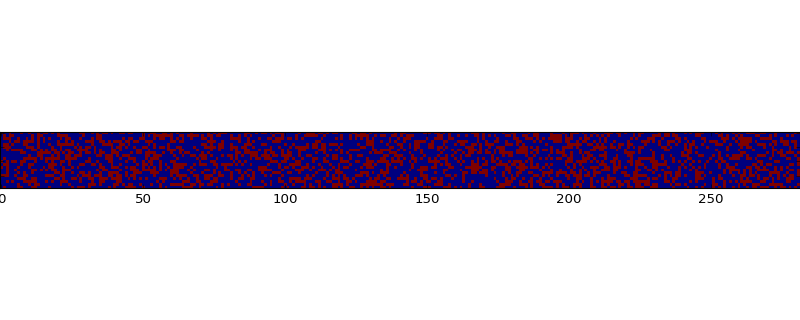

In [29]:
plot_cv(ShuffleSplit(len(X), 20, test_size=.4), len(X))